In [26]:
# Bagian 1 - Membangun CNN
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import SGD
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2



In [27]:
# Inisialisasi CNN
classifier = Sequential()

# Langkah 1 - Layer Konvolusi
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

# Langkah 2 - Pooling
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Menambahkan layer konvolusi kedua
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Menambahkan layer konvolusi ketiga
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Langkah 3 - Flattening
classifier.add(Flatten())

# Langkah 4 - Full Connection
classifier.add(Dense(512, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(256, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(10, activation='softmax'))

In [28]:
# Mengompilasi CNN
classifier.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

classifier.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,342,698 (5.12 MB)

 Trainable params: 1,342,698 (5.12 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Bagian 2 - Memasukkan CNN ke gambar
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    'mydata/training_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    'mydata/test_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

# Training the model
history = classifier.fit(
    training_set,
    steps_per_epoch=500,
    epochs=50,
    validation_data=test_set,
    validation_steps=700
)

Found 3628 images belonging to 10 classes.
Found 500 images belonging to 10 classes.
Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.1849 - loss: 2.2213 - val_accuracy: 0.4520 - val_loss: 1.8451
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.3575 - loss: 1.7801 - val_accuracy: 0.6740 - val_loss: 1.3381
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.4474 - loss: 1.5211 - val_accuracy: 0.6860 - val_loss: 1.0951
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.5207 - loss: 1.3309 - val_accuracy: 0.7100 - val_loss: 0.9609
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.5723 - loss: 1.1877 - val_accuracy: 0.7580 - val_loss: 0.8011
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.6144 - loss: 1.0538 - val_accuracy: 0.7520 - val_loss: 0.6921
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.6487 - loss: 0.9518 - val_accuracy: 0.7880 - val_loss: 0.6201
Epoch 8/

In [30]:
# Evaluasi model
loss, accuracy = classifier.evaluate(test_set, steps=100)
print("Loss on test set:", loss)
print("Accuracy on test set:", accuracy)


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9606 - loss: 0.1156 
Loss on test set: 0.1189601793885231
Accuracy on test set: 0.9599999785423279


In [21]:
# Menyimpan model
classifier.save('Trained_model100epoch.h5')

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


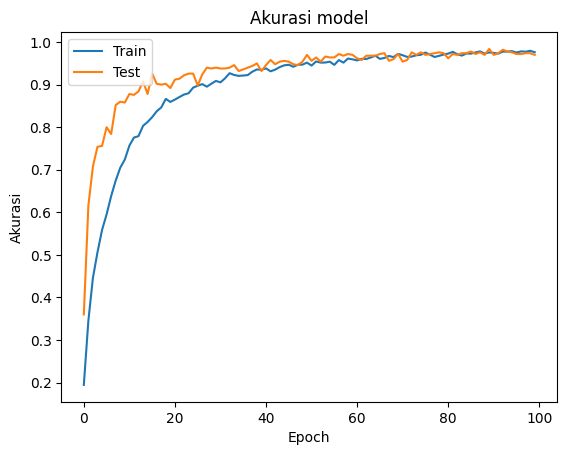

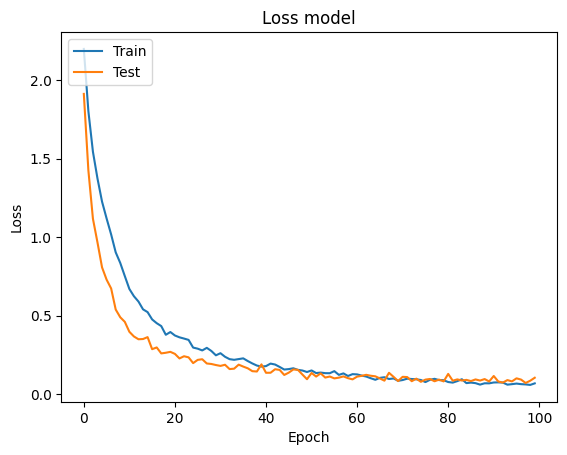

In [15]:
# Visualisasi hasil pelatihan model
print(history.history.keys())
import matplotlib.pyplot as plt

# Merangkum riwayat untuk akurasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi model')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Merangkum riwayat untuk loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [16]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np

# Predicting the test set results
test_set.reset()
y_pred = classifier.predict(test_set)
y_pred_classes = np.argmax(y_pred, axis=1)

# Getting true labels from the test set
y_true = test_set.classes

# Generating classification report
report = classification_report(y_true, y_pred_classes, target_names=list(test_set.class_indices.keys()))
print(report)

# Calculating precision, recall, and F1-score
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
# Evaluasi model
loss, accuracy = classifier.evaluate(test_set, steps=100)
print("Loss on test set:", loss)
print("Accuracy on test set:", accuracy)

# Generating confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print(conf_matrix)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
              precision    recall  f1-score   support

         dan       0.13      0.14      0.14        50
         hai       0.09      0.08      0.09        50
  i love you       0.06      0.06      0.06        50
        kami       0.04      0.04      0.04        50
       kasih       0.14      0.14      0.14        50
        kita       0.08      0.08      0.08        50
        maaf       0.08      0.08      0.08        50
        saya       0.11      0.10      0.10        50
    semangat       0.14      0.14      0.14        50
       takut       0.12      0.12      0.12        50

    accuracy                           0.10       500
   macro avg       0.10      0.10      0.10       500
weighted avg       0.10      0.10      0.10       500

Precision: 0.09839333270062718
Recall: 0.098
F1 Score: 0.09813622566364114
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9708 - loss: 0.1042 
Loss on test set: 0.10509786009788513
Accuracy on 

c:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


In [3]:
import base64
from PIL import Image
from io import BytesIO

# String base64 dari JSON
image_base64 = "iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAAAAACPAi4CAAACDUlEQVRYCaXBP2tTURzH4c+3KBZ0EapUQV1UIriIUIxDcVDbvAAhdXAQQas4OWVzs5ODqFTFOWnfQOIfkG5RXKVWoYMOQTHgICpS+Xlub9qk9x7uPfE+jyhIFCQKEgWJgkRBoiBRkChIFCQKEgWJgsR/mG7SHSMmgnT2MWCqBSImhmQ2wshfRI8YzugvVkqj8JseMRyDtW2AwIQjhnL4I7Fj3XvVSgsQQzjVNpwfu1hXbgMinLFJTy+DcESwepWtdPYliGBGgnBEqKkWCcIRoYyE+kUcEcpImGngiEBGwkyDiAh0dIWt3h0nIgIZSWNdHBHISNj9nYgI0xknYedPIiKM4byZoO/aIyIijJF08z4REeTqPGnCEUEMD+GIEB+OkNYu44gQ1Tpp+zs4IsB0E49Dn3BEAMNnpoEj8j24jo+IiHyGl4iIfIaXiIhcpWW8RETkMrwOfiYi8rw9ic/DG6wTeQyfW3eJiTzjHTzmasREHsNn+xoxkcPwERtEnr1fSJufpUfkMNLqJxZu0yOyTbzG48V5NogcRtq3PWwSORYvkCAGiWxXnpDSLtMnshl9q4urj4HuGANENiOmM6+gdgdHDBLZjNhcbWlydp40kc3oaVSFj8hmbKi0aFaaFRJEps44IMPR83Nl2iSJTIazcPoAUF2A0nuSRJblEoNEmsiwNAnYnx2su/T1GWn/AGa3c0E/TGYAAAAAAElFTkSuQmCC"

# Decode base64 string to bytes
image_data = base64.b64decode(image_base64)

# Create a BytesIO object from the bytes
image = Image.open(BytesIO(image_data))

# Show the image
image.show()
